In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import jax.numpy as jnp 
from jax import random, jit


# Bayesian Neural Network

- Use an SGLD kernel and compute the accuracy on the test dataset while training
- MNIST dataset

In [2]:
from sgmcmcjax.models.bayesian_NN.NN_data import X_train, X_test, y_train, y_test
from sgmcmcjax.models.bayesian_NN.NN_model import init_network, loglikelihood, logprior, accuracy

from sgmcmcjax.kernels import build_sgld_kernel
from tqdm.auto import tqdm

batch_size = int(0.01*X_train.shape[0])
data = (X_train, y_train)

init_fn, my_kernel, get_params = build_sgld_kernel(5e-5, loglikelihood, logprior, data, batch_size)

my_kernel = jit(my_kernel)

In [3]:
# define the inital state
key = random.PRNGKey(10)
key, subkey1, subkey2 = random.split(key,3)
sizes = [784, 100, 10]
params_IC = init_network(subkey1, sizes)
state = init_fn(subkey2, params_IC)

In [4]:
%%time

Nsamples = 2000
samples = []
accuracy_list = []

for i in tqdm(range(Nsamples)):
    key, subkey = random.split(key)
    state = my_kernel(i, subkey, state)
    samples.append(get_params(state))
    if i%10==0:
        accuracy_list.append(accuracy(get_params(state), X_test, y_test))
    


  0%|          | 0/2000 [00:00<?, ?it/s]

CPU times: user 28.3 s, sys: 2.77 s, total: 31.1 s
Wall time: 13.1 s


Final accuracy: 92.1%


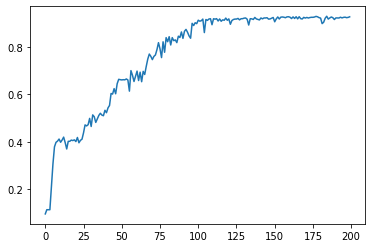

In [5]:
plt.plot(accuracy_list[:])

print(f"Final accuracy: {100*accuracy_list[-8]:.1f}%")